img shape= (1000, 2000, 3)
gray shape= (1000, 2000)
x shape= (50, 100, 20, 20)
train shape= (2500, 400)
test shape= (2500, 400)
train_labels.shape= (2500, 1)
test_labels.shape= (2500, 1)
92.0
['train', 'train_labels']
result[i][0][0] = 0
result[i][0][0] = 1
result[i][0][0] = 2
result[i][0][0] = 3
result[i][0][0] = 4
result[i][0][0] = 5
result[i][0][0] = 4
result[i][0][0] = 7
result[i][0][0] = 3
result[i][0][0] = 1


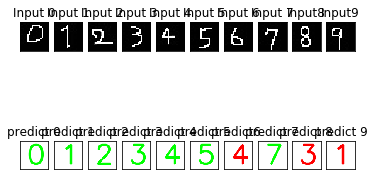

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#載入OpenCV內建的digits.png並灰值化，原始影像為1000x2000pixel ，3 channel
img = cv2.imread('digits.png')
print("img shape=",img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("gray shape=",gray.shape)

#把digits.png切成每一小塊20x20 pixel
#先將gray 1000x2000 [rowsxcols] pixel , 將row=1000/50 ：意為50列20pixel單位 
#再將產生的cols =2000/100 =>意為100行20pixel單位 
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)] 

#3.將cells為一50x100 的list轉成array (50,100,20,20)
x = np.array(cells)
print("x shape=",x.shape)

#4.把20x20 pixel 展平成一行400 pixel
#將cells array X 轉成5000x400 後並分成兩半 train's data and test's data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
print("train shape=",train.shape)
print("test shape=",test.shape)

#5.建立訓練和測試資料庫
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
print ("train_labels.shape=",train_labels.shape)
print ("test_labels.shape=",test_labels.shape)

#6. 開啟kNN開始訓練資料, 用K=1測試
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
ret, result, neighbours, dist = knn.findNearest(test, k=1)

#7.檢測分類的準確性
#和test_labels進行比較
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print (accuracy)

#8.儲存訓練資料
np.savez('knn_data.npz',train=train, train_labels=train_labels)
##-------------------------------------------------------------------------
#讀取訓練資料
with np.load('knn_data.npz') as data:
 print (data.files)
 train = data['train']
 train_labels = data['train_labels']
 
#載入手寫圖片20*20pixel 0-9
Input_Numer=[0]*10
img_num =[0]*10
img_res =[0]*10
testData_r=[0]*10
result=[0]*10
result_str=[0]*10
Input_Numer[0]="0.jpg"
Input_Numer[1]="1.jpg"
Input_Numer[2]="2.jpg"
Input_Numer[3]="3.jpg"
Input_Numer[4]="4.jpg"
Input_Numer[5]="5.jpg"
Input_Numer[6]="6.jpg"
Input_Numer[7]="7.jpg"
Input_Numer[8]="8.jpg"
Input_Numer[9]="9.jpg"
font = cv2.FONT_HERSHEY_SIMPLEX

#C.開始預測
for i in range(10):  #input 10 number
 img_num[i] = cv2.imread(Input_Numer[i],0)
 testData_r[i]  = img_num[i][:,:].reshape(-1,400).astype(np.float32) # Size = (1,400)
 ret, result[i], neighbours, dist = knn.findNearest(testData_r[i], k=5)
 #產生white screen以顯示預測結果的白底
 img_res[i] = np.zeros((64,64,3), np.uint8)
 img_res[i][:,:]=[255,255,255]
 #將結果轉成字串以便顯示在圖上
 print("result[i][0][0] =",result[i][0][0].astype(np.int32)) #change type from float32 to int32
 result_str[i]=str(result[i][0][0].astype(np.int32))
 if result[i][0][0].astype(np.int32)==i:
  cv2.putText(img_res[i],result_str[i],(15,52), font, 2,(0,255,0),3,cv2.LINE_AA)
 else:
  cv2.putText(img_res[i],result_str[i],(15,52), font, 2,(255,0,0),3,cv2.LINE_AA)
#===顯示輸入與預測結果圖======
Input_Numer_name = ['Input 0', 'Input 1','Input 2', 'Input 3','Input 4',\
     'Input 5','Input 6', 'Input 7','Input8', 'Input9']
predict_Numer_name =['predict 0', 'predict 1','predict 2', 'predict 3','predict 4', \
     'predict 5','predict6 ', 'predict 7','predict 8', 'predict 9']
for i in range(10):
 plt.subplot(2,10,i+1),plt.imshow(img_num[i],cmap = 'gray')
 plt.title(Input_Numer_name[i]), plt.xticks([]), plt.yticks([])
 plt.subplot(2,10,i+11),plt.imshow(img_res[i],cmap = 'gray')
 plt.title(predict_Numer_name[i]), plt.xticks([]), plt.yticks([])
plt.show()